In [73]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.svm import SVC
from tabulate import tabulate  
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_validate

In [69]:
dataset_dict = ["circles0.3.csv","halfkernel.csv", "moons1.csv", "spiral1.csv", "twogaussians33.csv", "twogaussians42.csv"]

In [77]:
# npv_scoring function calculates Negative Predictive Value (NPV) based on the confusion matrix
def npv_scoring(y_true, y_pred):
    # Use confusion_matrix from scikit-learn to get true negatives (tn), false positives (fp), false negatives (fn), and true positives (tp)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Calculate NPV, handling the case where the denominator is zero to avoid division by zero
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0

    # Return the calculated NPV
    return npv

In [81]:
# specificity_scoring function calculates Specificity based on the confusion matrix
def specificity_scoring(y_true, y_pred):
    # Use confusion_matrix from scikit-learn to get true negatives (tn), false positives (fp), false negatives (fn), and true positives (tp)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Calculate Specificity, handling the case where the denominator is zero to avoid division by zero
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    # Return the calculated Specificity
    return specificity


In [82]:
scoring = {
    'ppv': make_scorer(precision_score),
    'npv': make_scorer(npv_scoring),
    'sensitivity': make_scorer(recall_score),
    'accuracy': make_scorer(accuracy_score),
    'specificity': make_scorer(specificity_scoring),
}

C:\Users\singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


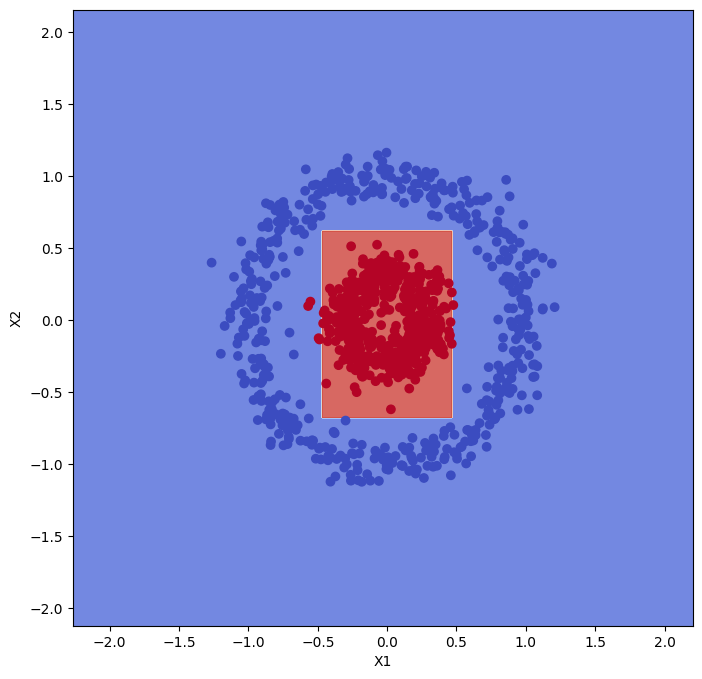

C:\Users\singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


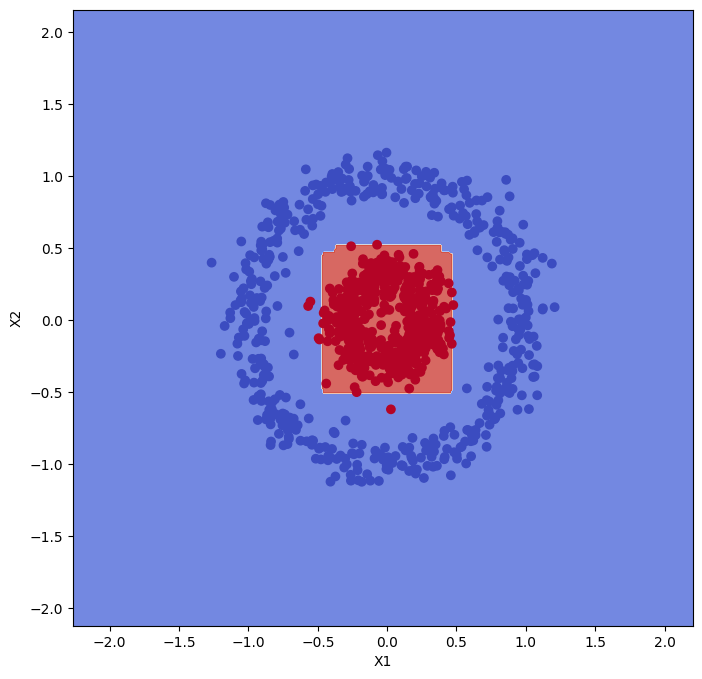

C:\Users\singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


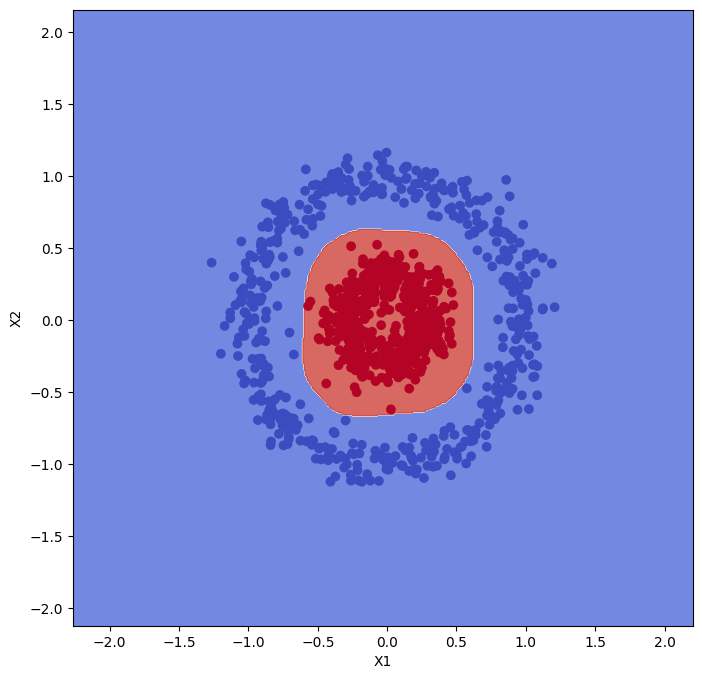

************************************circles0.3.csv******************************************

+----+----------------+----------------+----------+----------+---------------+---------------+------------+
|    | Classifier     | Dataset        |      PPV |      NPV |   Specificity |   Sensitivity |   Accuracy |
+====+================+================+==========+==========+===============+===============+============+
|  0 | Decision Tree  | circles0.3.csv | 0.996154 | 0.988948 |         0.996 |         0.988 |      0.992 |
+----+----------------+----------------+----------+----------+---------------+---------------+------------+
|  1 | Random Forest  | circles0.3.csv | 1        | 0.985027 |         1     |         0.984 |      0.992 |
+----+----------------+----------------+----------+----------+---------------+---------------+------------+
|  2 | Neural Network | circles0.3.csv | 1        | 1        |         1     |         1     |      1     |
+----+----------------+----------------+--

C:\Users\singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


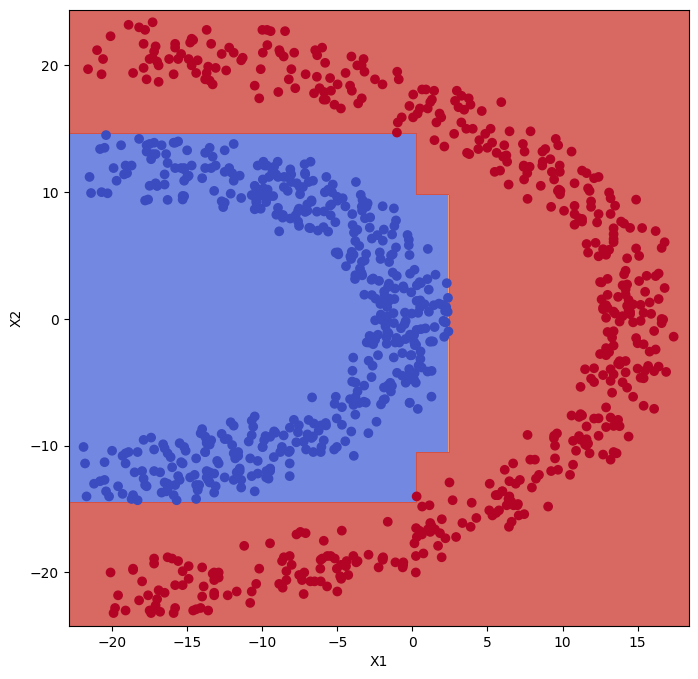

C:\Users\singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


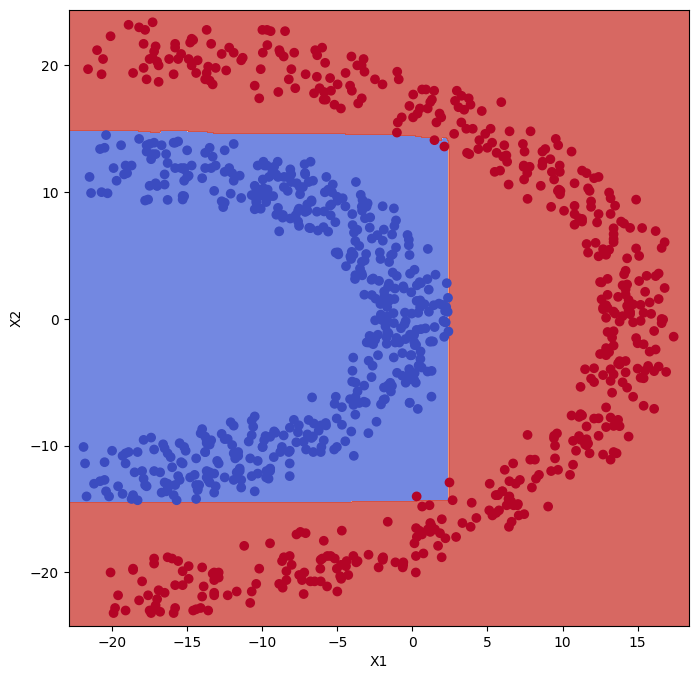

C:\Users\singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


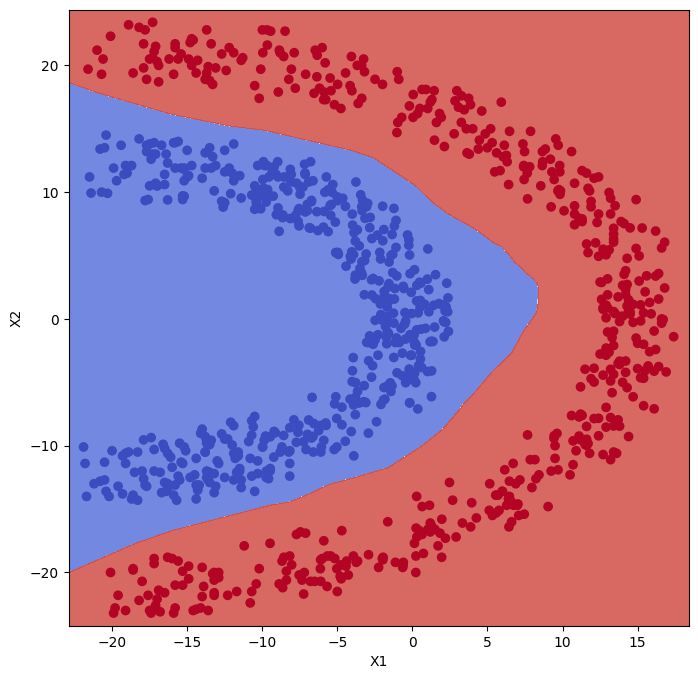

************************************halfkernel.csv******************************************

+----+----------------+----------------+----------+----------+---------------+---------------+------------+
|    | Classifier     | Dataset        |      PPV |      NPV |   Specificity |   Sensitivity |   Accuracy |
+====+================+================+==========+==========+===============+===============+============+
|  0 | Decision Tree  | halfkernel.csv | 0.998039 | 0.996078 |         0.998 |         0.996 |      0.997 |
+----+----------------+----------------+----------+----------+---------------+---------------+------------+
|  1 | Random Forest  | halfkernel.csv | 0.998039 | 0.992232 |         0.998 |         0.992 |      0.995 |
+----+----------------+----------------+----------+----------+---------------+---------------+------------+
|  2 | Neural Network | halfkernel.csv | 1        | 1        |         1     |         1     |      1     |
+----+----------------+----------------+--

C:\Users\singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


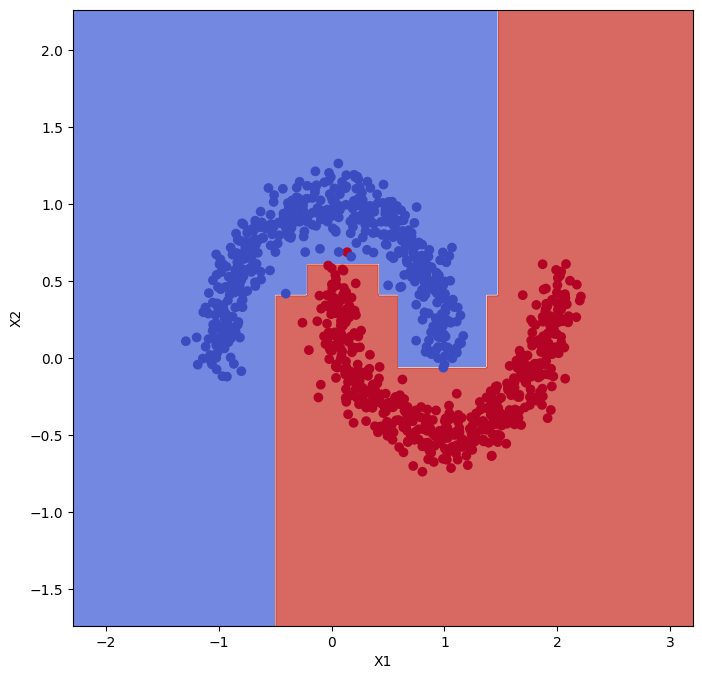

C:\Users\singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


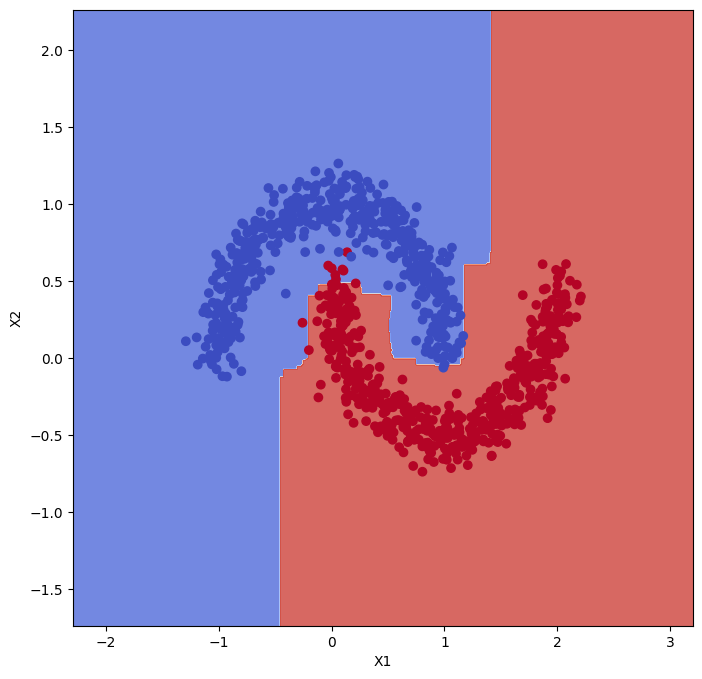

C:\Users\singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


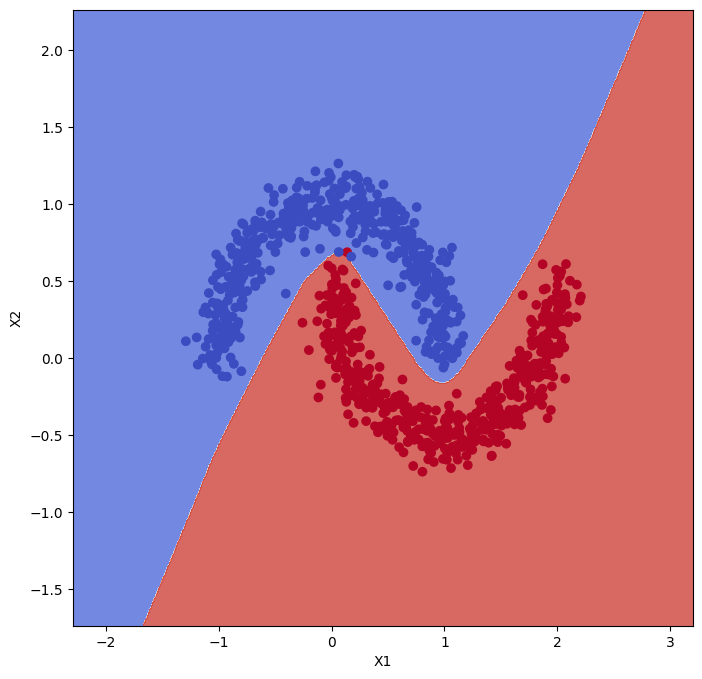

************************************moons1.csv******************************************

+----+----------------+------------+----------+----------+---------------+---------------+------------+
|    | Classifier     | Dataset    |      PPV |      NPV |   Specificity |   Sensitivity |   Accuracy |
+====+================+============+==========+==========+===============+===============+============+
|  0 | Decision Tree  | moons1.csv | 0.994078 | 0.996039 |         0.994 |         0.996 |      0.995 |
+----+----------------+------------+----------+----------+---------------+---------------+------------+
|  1 | Random Forest  | moons1.csv | 0.993917 | 0.971209 |         0.994 |         0.97  |      0.982 |
+----+----------------+------------+----------+----------+---------------+---------------+------------+
|  2 | Neural Network | moons1.csv | 0.998039 | 0.998039 |         0.998 |         0.998 |      0.998 |
+----+----------------+------------+----------+----------+---------------+----

C:\Users\singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


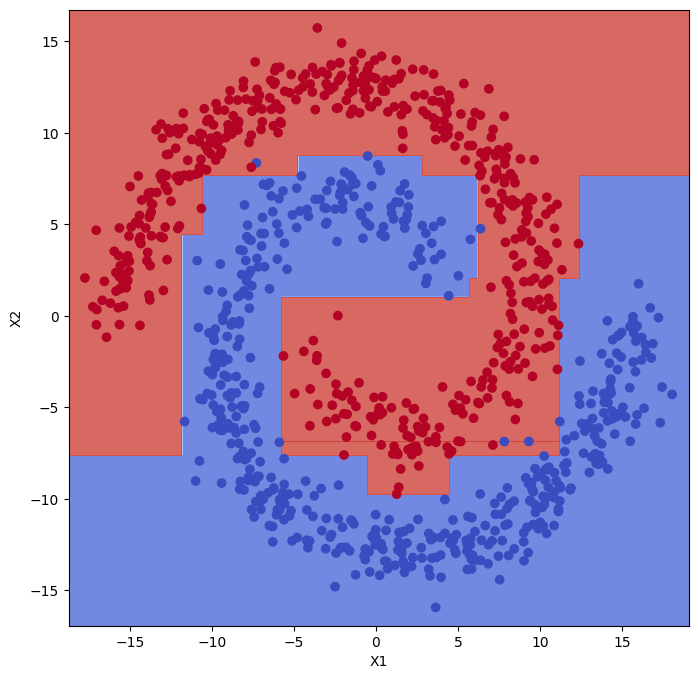

C:\Users\singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


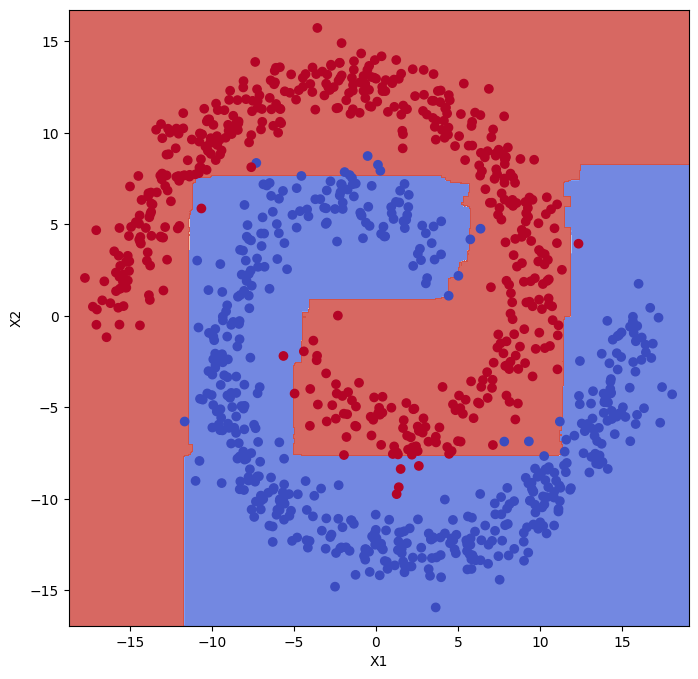

C:\Users\singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


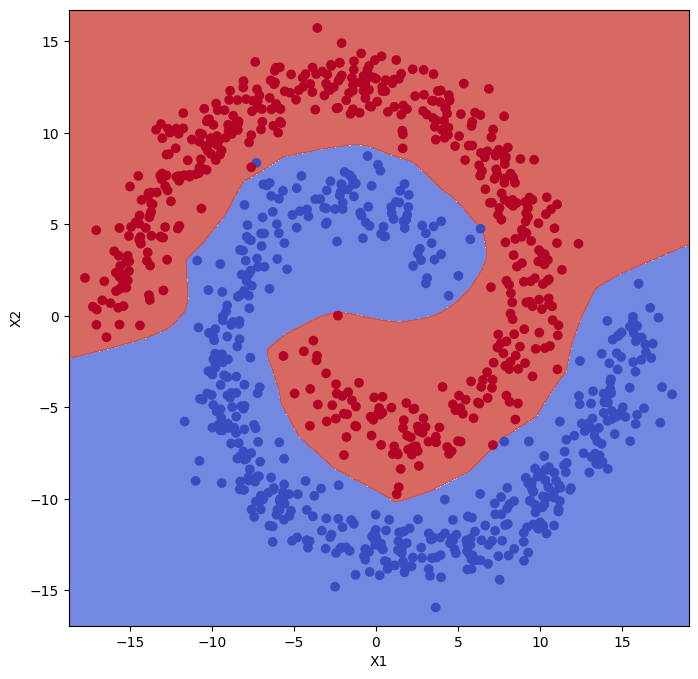

************************************spiral1.csv******************************************

+----+----------------+-------------+----------+----------+---------------+---------------+------------+
|    | Classifier     | Dataset     |      PPV |      NPV |   Specificity |   Sensitivity |   Accuracy |
+====+================+=============+==========+==========+===============+===============+============+
|  0 | Decision Tree  | spiral1.csv | 0.988188 | 0.974845 |         0.988 |         0.974 |      0.981 |
+----+----------------+-------------+----------+----------+---------------+---------------+------------+
|  1 | Random Forest  | spiral1.csv | 0.972946 | 0.980567 |         0.972 |         0.98  |      0.976 |
+----+----------------+-------------+----------+----------+---------------+---------------+------------+
|  2 | Neural Network | spiral1.csv | 0.990271 | 0.994038 |         0.99  |         0.994 |      0.992 |
+----+----------------+-------------+----------+----------+----------

C:\Users\singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


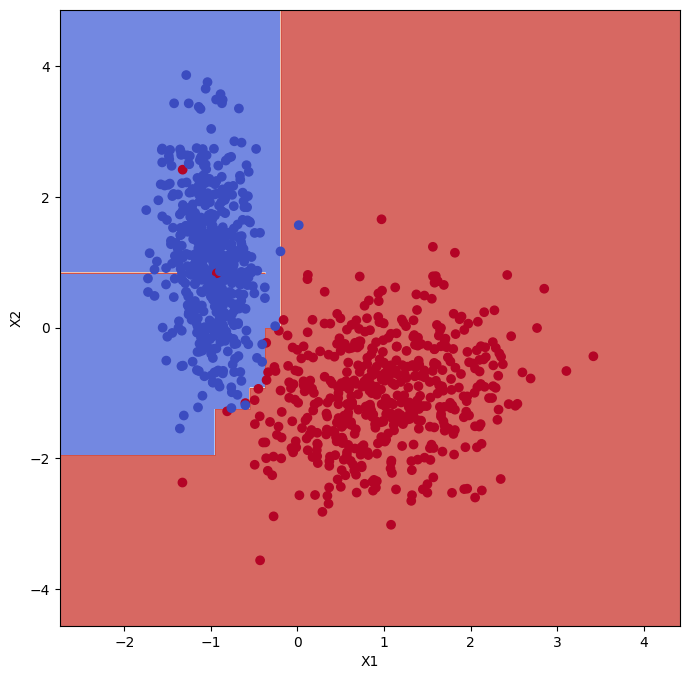

C:\Users\singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


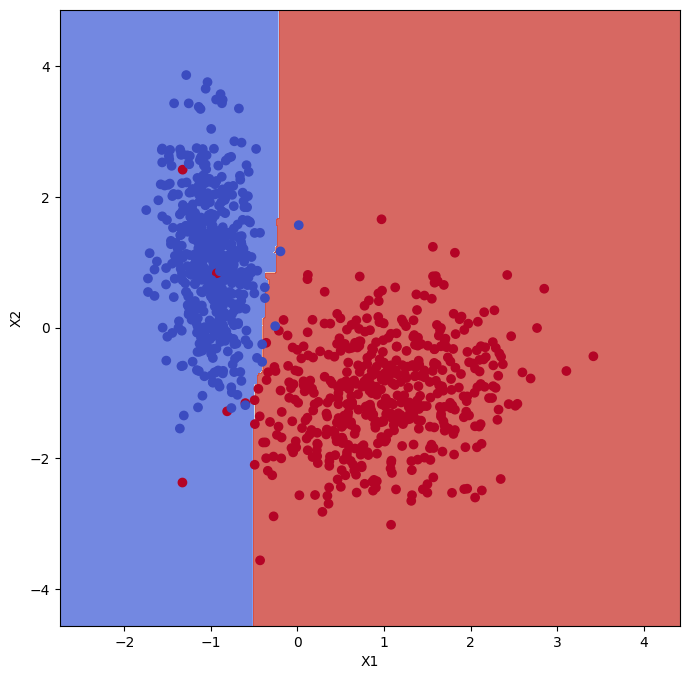

C:\Users\singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


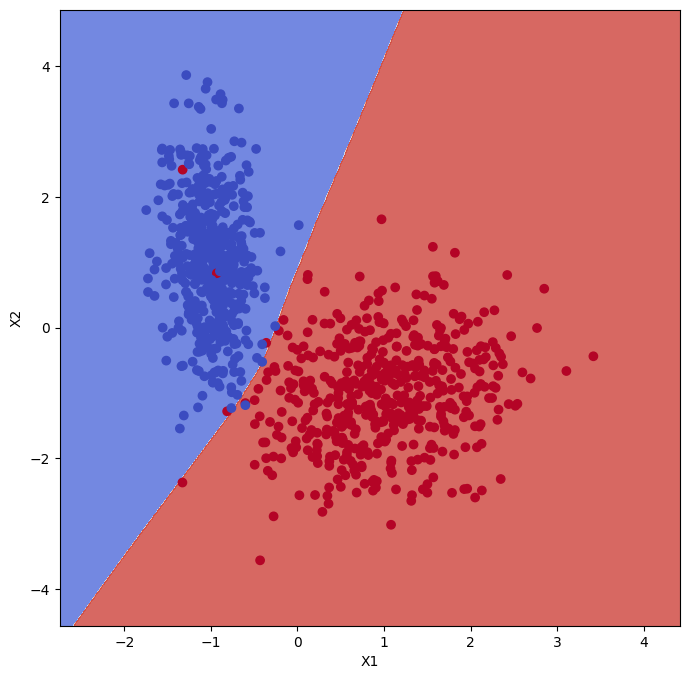

************************************twogaussians33.csv******************************************

+----+----------------+--------------------+----------+----------+---------------+---------------+------------+
|    | Classifier     | Dataset            |      PPV |      NPV |   Specificity |   Sensitivity |   Accuracy |
+====+================+====================+==========+==========+===============+===============+============+
|  0 | Decision Tree  | twogaussians33.csv | 0.988078 | 0.980231 |      0.987959 |      0.980039 |      0.984 |
+----+----------------+--------------------+----------+----------+---------------+---------------+------------+
|  1 | Random Forest  | twogaussians33.csv | 0.990191 | 0.984309 |      0.989959 |      0.984039 |      0.987 |
+----+----------------+--------------------+----------+----------+---------------+---------------+------------+
|  2 | Neural Network | twogaussians33.csv | 0.996078 | 0.990232 |      0.996    |      0.990039 |      0.993 |
+----+

C:\Users\singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


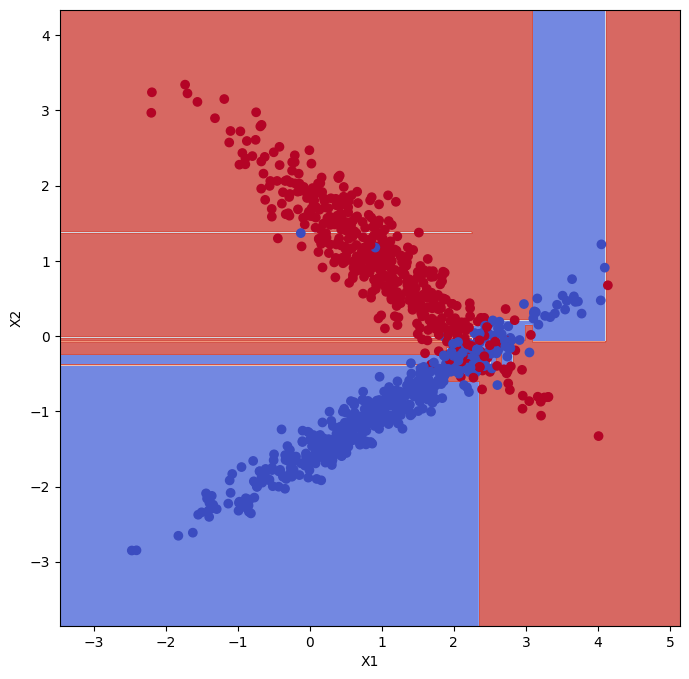

C:\Users\singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


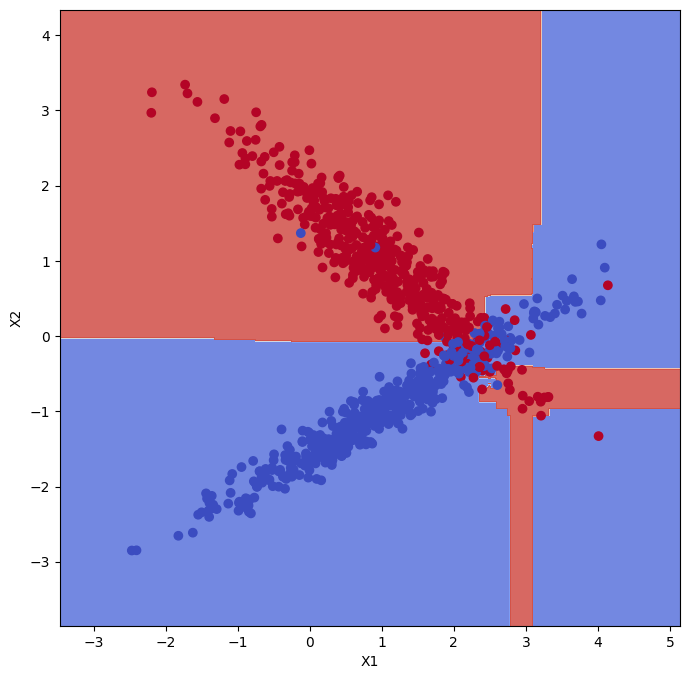

C:\Users\singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


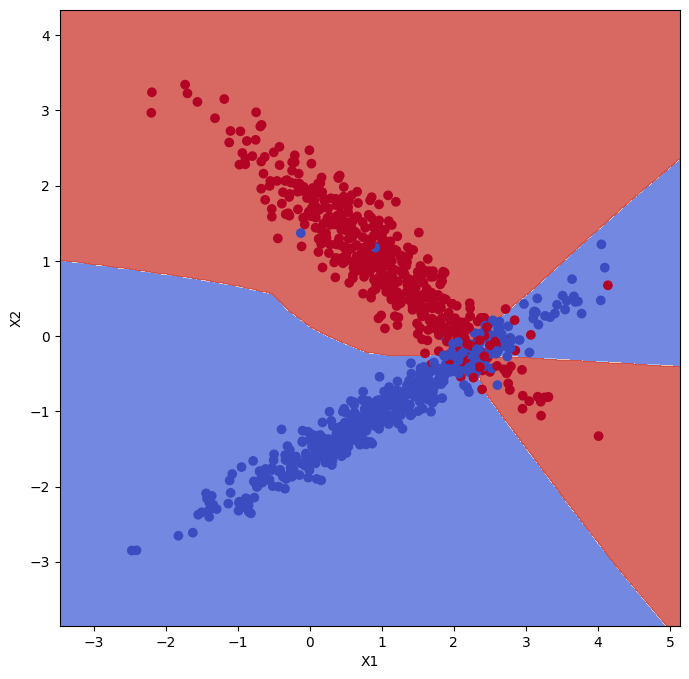

************************************twogaussians42.csv******************************************

+----+----------------+--------------------+----------+----------+---------------+---------------+------------+
|    | Classifier     | Dataset            |      PPV |      NPV |   Specificity |   Sensitivity |   Accuracy |
+====+================+====================+==========+==========+===============+===============+============+
|  0 | Decision Tree  | twogaussians42.csv | 0.931767 | 0.917672 |         0.932 |      0.915796 |      0.924 |
+----+----------------+--------------------+----------+----------+---------------+---------------+------------+
|  1 | Random Forest  | twogaussians42.csv | 0.97632  | 0.90695  |         0.978 |      0.897714 |      0.938 |
+----+----------------+--------------------+----------+----------+---------------+---------------+------------+
|  2 | Neural Network | twogaussians42.csv | 0.964946 | 0.926356 |         0.966 |      0.921714 |      0.944 |
+----+

In [84]:
# Define classifiers to be used
decision_tree = DecisionTreeClassifier(criterion='log_loss', splitter='best', max_depth=None,
                                       min_samples_split=5, min_samples_leaf=1, max_features=2, random_state=25)
random_forest = RandomForestClassifier(n_estimators=300, criterion='log_loss', max_depth=None,
                                       min_samples_split=50, min_samples_leaf=10, max_features='sqrt',
                                       bootstrap=True, random_state=42, n_jobs=-1)
neural_network = MLPClassifier(hidden_layer_sizes=(40, 30), max_iter=1500)

# Create a dictionary to store the models
models = {
    'Decision Tree': decision_tree,
    'Random Forest': random_forest,
    'Neural Network': neural_network
}

# Iterate through each dataset
for data in dataset_dict:
    # Read dataset
    df = pd.read_csv(data)

    # Separate features (X) and labels (y)
    X = df.drop(columns='label')
    y = df['label']

    results = []
    
    # Iterate through each model
    for model_name, model in models.items():
        
        # Cross-validate the model using the specified metrics and return the fitted estimators
        cv_results = cross_validate(model, X, y, scoring=scoring, cv=10, return_estimator=True)
        estimator = cv_results['estimator']

        # Extract and print results
        ppv_avg = cv_results['test_ppv'].mean()
        recall_avg = cv_results['test_sensitivity'].mean()
        accuracy_avg = cv_results['test_accuracy'].mean()
        npv_avg = cv_results['test_npv'].mean()
        specificity_avg = cv_results['test_specificity'].mean()

        results.append([model_name, data, ppv_avg, npv_avg, specificity_avg, recall_avg, accuracy_avg])

        # Plot decision boundary for the first estimator of each model
        features = X.to_numpy()
        output_class = y.to_numpy()

        x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
        y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1

        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

        Z = estimator[0].predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.figure(figsize=(8, 8))
        plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.8)
        plt.scatter(features[:, 0], features[:, 1], c=output_class, cmap="coolwarm")
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.show()

    # Create a DataFrame to store the results
    results_df = pd.DataFrame(results, columns=["Classifier", "Dataset", "PPV", "NPV", "Specificity", "Sensitivity", "Accuracy"])

    table_format = "grid"  # Change this to your preferred table format

    # Print the results as a table
    print('************************************' + data + '******************************************\n')
    print(tabulate(results_df, headers="keys", tablefmt=table_format))
    print()


In [92]:
# Load the breast cancer dataset
data = pd.read_csv('Breastcancer.csv')

# Separate the features (X) and the labels (y)
X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]   # The last column

cols = X.columns

In [131]:
y.unique()

array(['Basal', 'Her2', 'LumA', 'LumB', 'Normal'], dtype=object)

In [118]:
# Import MinMaxScaler from scikit-learn
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the features (X) to make the data non-negative
X_nonNegative = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame with the original column names
X_nonNegative = pd.DataFrame(X_nonNegative, columns=X.columns)


In [119]:
# Import SelectKBest and chi2 from scikit-learn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Create an instance of SelectKBest with chi2 as the score function
chi2_select = SelectKBest(score_func=chi2, k="all")

# Fit and transform the non-negative scaled features (X_nonNegative) using chi2 feature selection
chi2_score = chi2_select.fit(X_nonNegative, y)

# Extract the chi2 scores for each feature
chi_value = pd.Series(chi2_score.scores_, index=cols)

# Sort the features based on their chi2 scores in descending order
chi_value.sort_values(ascending=False, inplace=True)


In [172]:
chi_value.head(8)

AGR3        22.489446
FOXA1       20.483725
MIA         19.793050
ATL2        19.187792
PPP1R14C    17.323979
ROPN1       16.369230
SOX11       16.284443
WNT6        16.229333
dtype: float64

In [169]:
featureCount = []
accuracyList = []

In [162]:
def calculate_metrics_multiclass(confusion_matrix, nF, classes):
    metrics = []
    tempAcc = []
    # Loop through each class
    for i in range(len(confusion_matrix)):
        # Extract elements from the confusion matrix for the current class
        tp = confusion_matrix[i, i]
        fp = np.sum(confusion_matrix[:, i]) - tp
        fn = np.sum(confusion_matrix[i, :]) - tp
        tn = np.sum(confusion_matrix) - tp - fp - fn

        # Calculate various metrics
        accuracy = (tp + tn) / (tp + tn + fp + fn)
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        npv = tn / (tn + fn) if (tn + fn) > 0 else 0

        # Append accuracy for each class to tempAcc list
        tempAcc.append(accuracy)

        # Append metrics for the current class to the metrics list
        metrics.append([classes[i], "RF", "BreastCancer", nF, precision, npv, specificity, recall, accuracy])

    # Calculate the mean accuracy across all classes and append to accuracyList
    featureCount.append(nF)
    accuracyList.append(np.mean(tempAcc))

    # Create a DataFrame to store the results
    results_df = pd.DataFrame(metrics, columns=["Class", "Classifier", "Dataset", "No. of Features", "PPV", "NPV", "Specificity", "Sensitivity", "Accuracy"])

    table_format = "grid"  # Change this to your preferred table format

    # Print the results as a table
    print(tabulate(results_df, headers="keys", tablefmt=table_format))
    print()


In [134]:
# Import SMOTE from the imbalanced-learn library
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE with a specified random state
smote = SMOTE(random_state=42)

# Apply SMOTE to the dataset to balance the class distribution
X_resampled, y_resampled = smote.fit_resample(X, y)


+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|    | Class   | Classifier   | Dataset      |   No. of Features |      PPV |      NPV |   Specificity |   Sensitivity |   Accuracy |
+====+=========+==============+==============+===================+==========+==========+===============+===============+============+
|  0 | Basal   | RF           | BreastCancer |                 2 | 0.944444 | 0.990521 |      0.985849 |      0.962264 |   0.981132 |
+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|  1 | Her2    | RF           | BreastCancer |                 2 | 0.803922 | 0.943925 |      0.95283  |      0.773585 |   0.916981 |
+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|  2 | LumA    | RF           | BreastCancer |                

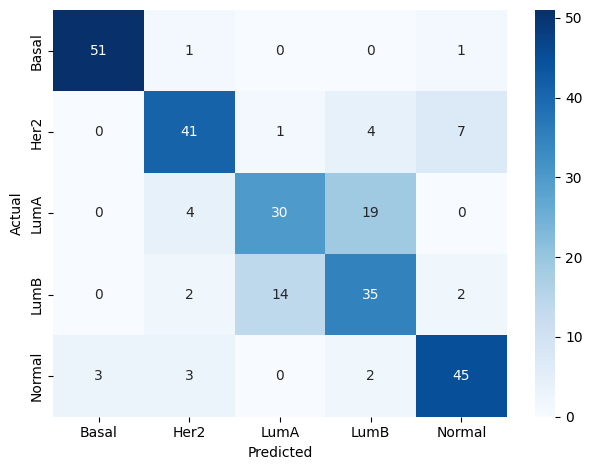

+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|    | Class   | Classifier   | Dataset      |   No. of Features |      PPV |      NPV |   Specificity |   Sensitivity |   Accuracy |
+====+=========+==============+==============+===================+==========+==========+===============+===============+============+
|  0 | Basal   | RF           | BreastCancer |                 3 | 0.944444 | 0.990521 |      0.985849 |      0.962264 |   0.981132 |
+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|  1 | Her2    | RF           | BreastCancer |                 3 | 0.785714 | 0.956938 |      0.943396 |      0.830189 |   0.920755 |
+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|  2 | LumA    | RF           | BreastCancer |                

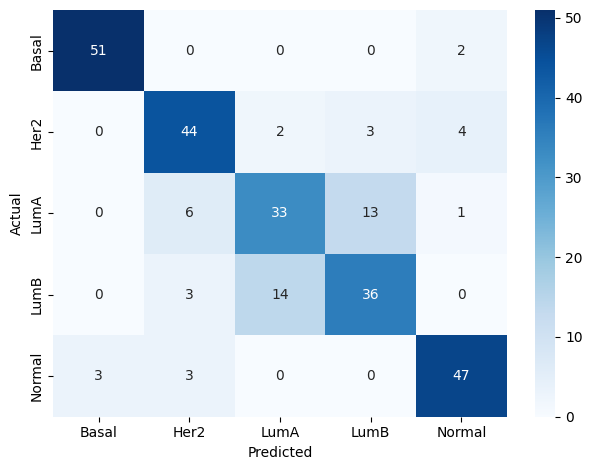

+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|    | Class   | Classifier   | Dataset      |   No. of Features |      PPV |      NPV |   Specificity |   Sensitivity |   Accuracy |
+====+=========+==============+==============+===================+==========+==========+===============+===============+============+
|  0 | Basal   | RF           | BreastCancer |                 4 | 0.962963 | 0.995261 |      0.990566 |      0.981132 |   0.988679 |
+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|  1 | Her2    | RF           | BreastCancer |                 4 | 0.821429 | 0.966507 |      0.95283  |      0.867925 |   0.935849 |
+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|  2 | LumA    | RF           | BreastCancer |                

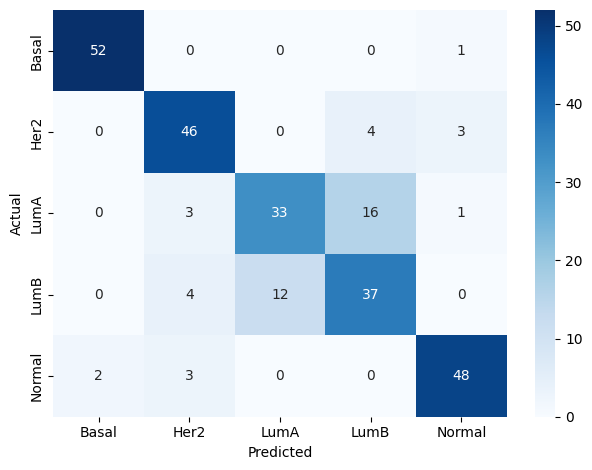

+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|    | Class   | Classifier   | Dataset      |   No. of Features |      PPV |      NPV |   Specificity |   Sensitivity |   Accuracy |
+====+=========+==============+==============+===================+==========+==========+===============+===============+============+
|  0 | Basal   | RF           | BreastCancer |                 5 | 0.962963 | 0.995261 |      0.990566 |      0.981132 |   0.988679 |
+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|  1 | Her2    | RF           | BreastCancer |                 5 | 0.888889 | 0.976303 |      0.971698 |      0.90566  |   0.958491 |
+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|  2 | LumA    | RF           | BreastCancer |                

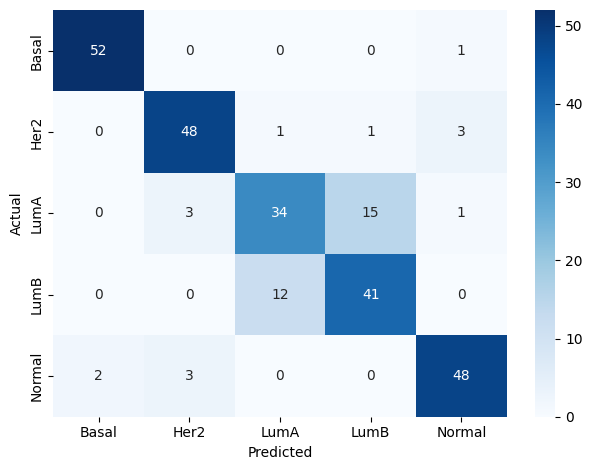

+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|    | Class   | Classifier   | Dataset      |   No. of Features |      PPV |      NPV |   Specificity |   Sensitivity |   Accuracy |
+====+=========+==============+==============+===================+==========+==========+===============+===============+============+
|  0 | Basal   | RF           | BreastCancer |                 6 | 0.962963 | 0.995261 |      0.990566 |      0.981132 |   0.988679 |
+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|  1 | Her2    | RF           | BreastCancer |                 6 | 0.924528 | 0.981132 |      0.981132 |      0.924528 |   0.969811 |
+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|  2 | LumA    | RF           | BreastCancer |                

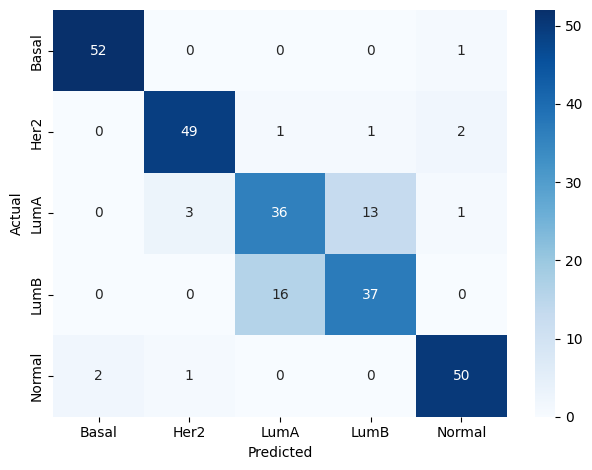

+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|    | Class   | Classifier   | Dataset      |   No. of Features |      PPV |      NPV |   Specificity |   Sensitivity |   Accuracy |
+====+=========+==============+==============+===================+==========+==========+===============+===============+============+
|  0 | Basal   | RF           | BreastCancer |                 7 | 0.963636 | 1        |      0.990566 |      1        |   0.992453 |
+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|  1 | Her2    | RF           | BreastCancer |                 7 | 0.961538 | 0.985915 |      0.990566 |      0.943396 |   0.981132 |
+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|  2 | LumA    | RF           | BreastCancer |                

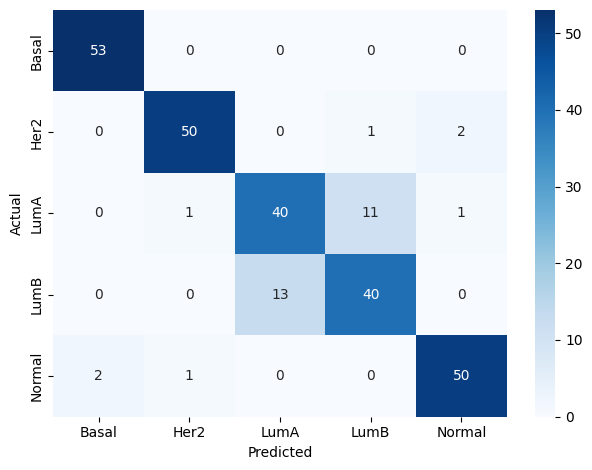

+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|    | Class   | Classifier   | Dataset      |   No. of Features |      PPV |      NPV |   Specificity |   Sensitivity |   Accuracy |
+====+=========+==============+==============+===================+==========+==========+===============+===============+============+
|  0 | Basal   | RF           | BreastCancer |                 8 | 0.981481 | 1        |      0.995283 |      1        |   0.996226 |
+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|  1 | Her2    | RF           | BreastCancer |                 8 | 0.962264 | 0.990566 |      0.990566 |      0.962264 |   0.984906 |
+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|  2 | LumA    | RF           | BreastCancer |                

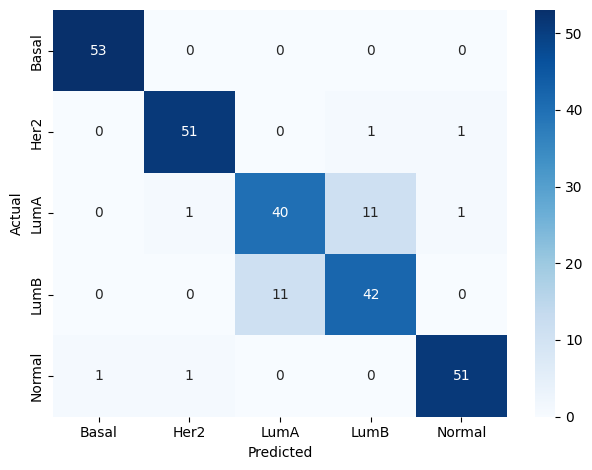

+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|    | Class   | Classifier   | Dataset      |   No. of Features |      PPV |      NPV |   Specificity |   Sensitivity |   Accuracy |
+====+=========+==============+==============+===================+==========+==========+===============+===============+============+
|  0 | Basal   | RF           | BreastCancer |                 9 | 1        | 1        |      1        |      1        |   1        |
+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|  1 | Her2    | RF           | BreastCancer |                 9 | 0.944444 | 0.990521 |      0.985849 |      0.962264 |   0.981132 |
+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|  2 | LumA    | RF           | BreastCancer |                

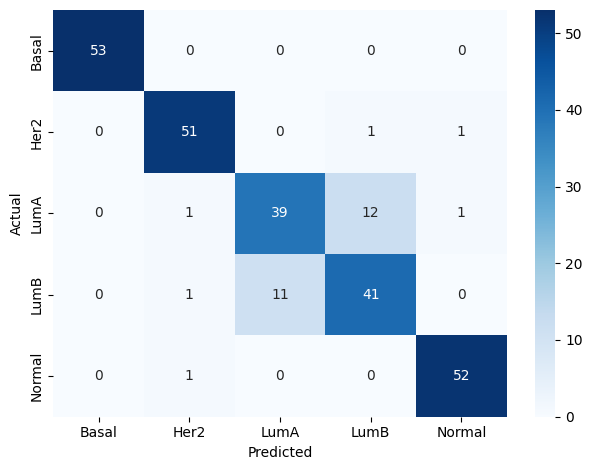

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


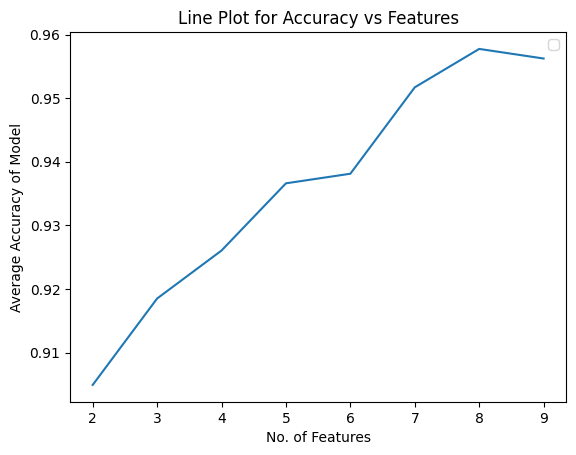

In [164]:
accuracy_list = []
feature_count_list = []

featureCount = []
accuracyList = []
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
results_rf = []

# Iterate through different numbers of features (n)
for n in range(2, 10):
    # Select the top n features based on chi2 scores
    top_n_features = chi_value.head(n)
    top_n_feature_names = top_n_features.index.tolist()

    # Extract the selected features from the resampled dataset
    X_new = X_resampled[top_n_feature_names]

    # Initialize a Random Forest Classifier
    rf = RandomForestClassifier(n_estimators=300, random_state=42)

    # Initialize a One-vs-One Classifier using the Random Forest as the base classifier
    ovo = OneVsOneClassifier(rf, n_jobs=-1)

    # Use cross_val_predict for cross-validation and prediction
    cv_results = cross_val_predict(ovo, X_new, y_resampled, cv=10)

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_resampled, cv_results)

    # Calculate and print metrics for each class
    calculate_metrics_multiclass(conf_matrix, n, ['Basal', 'Her2', 'LumA', 'LumB', 'Normal'])

    # Visualize the confusion matrix using a heatmap
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Basal', 'Her2', 'LumA', 'LumB', 'Normal'], yticklabels=['Basal', 'Her2', 'LumA', 'LumB', 'Normal'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# Plot a line graph showing the relationship between the number of features and average accuracy
plt.plot(featureCount, accuracyList, label="")

# Add labels and legend
plt.xlabel('No. of Features')
plt.ylabel('Average Accuracy of Model')
plt.title('Line Plot for Accuracy vs Features')
plt.legend()

# Show the plot
plt.show()


In [160]:
# Import the mrmr_classif function from the mrmr library
from mrmr import mrmr_classif

# Perform mRMR feature selection
# X_resampled is the input feature matrix
# y_resampled is the target variable
# K is the number of features to select (15 in this case)
selected_features = mrmr_classif(X=X_resampled, y=y_resampled, K=15)

100%|██████████████████████████████████████████| 15/15 [00:32<00:00,  2.14s/it]


In [173]:
selected_features

['FOXA1',
 'DST',
 'NDP',
 'PMAIP1',
 'AGR3',
 'CENPF',
 'MIA',
 'TBC1D9',
 'MUCL1',
 'ATL2',
 'NDC80',
 'AR',
 'GATA3',
 'ZNF238',
 'TNXB']

+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|    | Class   | Classifier   | Dataset      |   No. of Features |      PPV |      NPV |   Specificity |   Sensitivity |   Accuracy |
+====+=========+==============+==============+===================+==========+==========+===============+===============+============+
|  0 | Basal   | RF           | BreastCancer |                 2 | 0.961538 | 0.985915 |      0.990566 |      0.943396 |   0.981132 |
+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|  1 | Her2    | RF           | BreastCancer |                 2 | 0.5625   | 0.915423 |      0.867925 |      0.679245 |   0.830189 |
+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|  2 | LumA    | RF           | BreastCancer |                

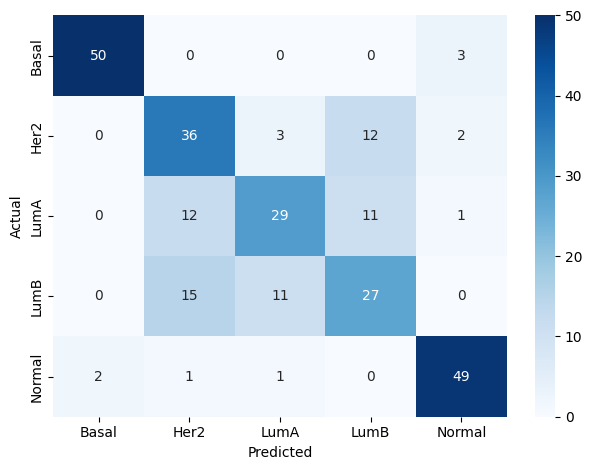

+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|    | Class   | Classifier   | Dataset      |   No. of Features |      PPV |      NPV |   Specificity |   Sensitivity |   Accuracy |
+====+=========+==============+==============+===================+==========+==========+===============+===============+============+
|  0 | Basal   | RF           | BreastCancer |                 3 | 0.962264 | 0.990566 |      0.990566 |      0.962264 |   0.984906 |
+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|  1 | Her2    | RF           | BreastCancer |                 3 | 0.846154 | 0.957746 |      0.962264 |      0.830189 |   0.935849 |
+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|  2 | LumA    | RF           | BreastCancer |                

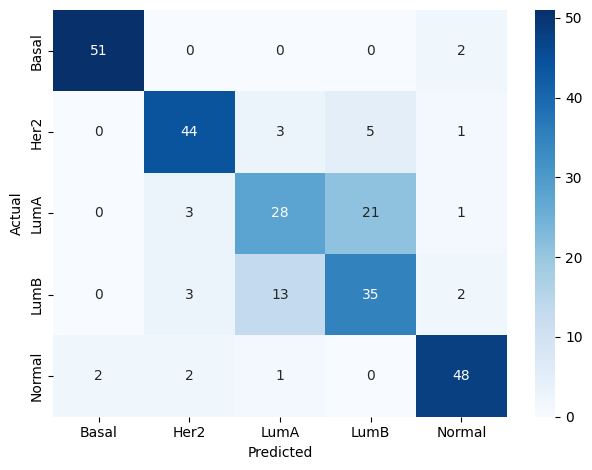

+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|    | Class   | Classifier   | Dataset      |   No. of Features |      PPV |      NPV |   Specificity |   Sensitivity |   Accuracy |
+====+=========+==============+==============+===================+==========+==========+===============+===============+============+
|  0 | Basal   | RF           | BreastCancer |                 4 | 0.962264 | 0.990566 |      0.990566 |      0.962264 |   0.984906 |
+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|  1 | Her2    | RF           | BreastCancer |                 4 | 0.872727 | 0.97619  |      0.966981 |      0.90566  |   0.954717 |
+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|  2 | LumA    | RF           | BreastCancer |                

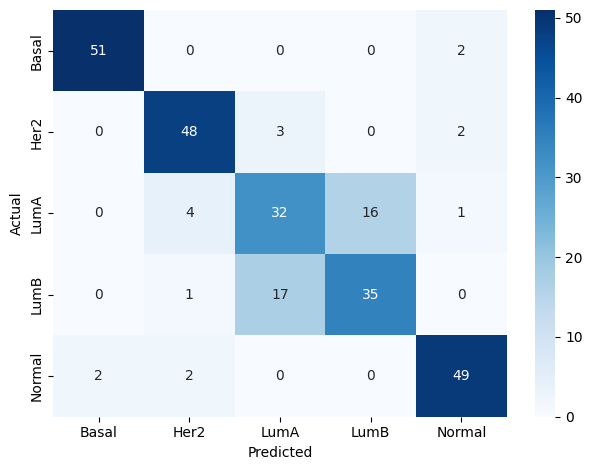

+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|    | Class   | Classifier   | Dataset      |   No. of Features |      PPV |      NPV |   Specificity |   Sensitivity |   Accuracy |
+====+=========+==============+==============+===================+==========+==========+===============+===============+============+
|  0 | Basal   | RF           | BreastCancer |                 5 | 1        | 1        |      1        |      1        |   1        |
+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|  1 | Her2    | RF           | BreastCancer |                 5 | 0.907407 | 0.981043 |      0.976415 |      0.924528 |   0.966038 |
+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|  2 | LumA    | RF           | BreastCancer |                

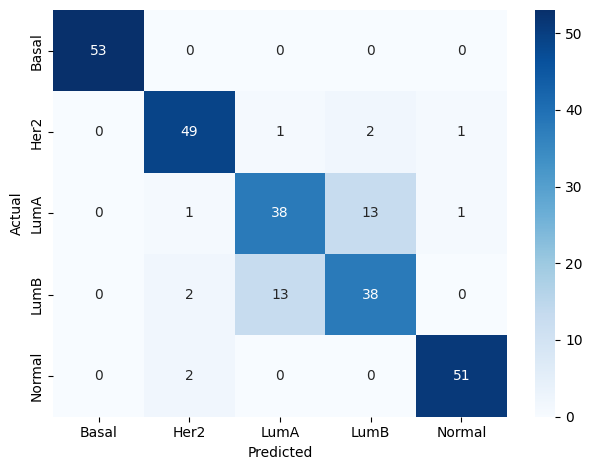

+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|    | Class   | Classifier   | Dataset      |   No. of Features |      PPV |      NPV |   Specificity |   Sensitivity |   Accuracy |
+====+=========+==============+==============+===================+==========+==========+===============+===============+============+
|  0 | Basal   | RF           | BreastCancer |                 6 | 1        | 1        |      1        |      1        |   1        |
+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|  1 | Her2    | RF           | BreastCancer |                 6 | 0.944444 | 0.990521 |      0.985849 |      0.962264 |   0.981132 |
+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|  2 | LumA    | RF           | BreastCancer |                

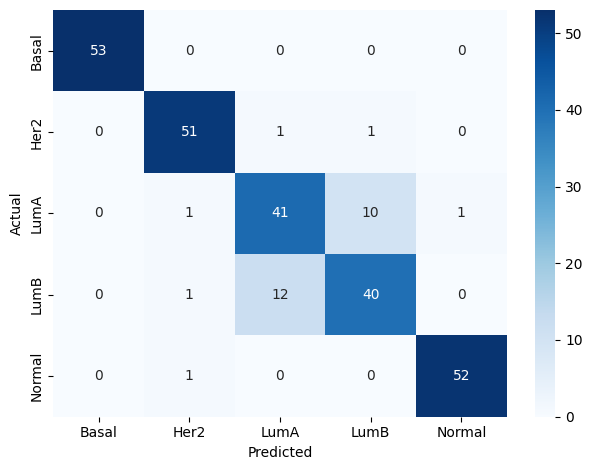

+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|    | Class   | Classifier   | Dataset      |   No. of Features |      PPV |      NPV |   Specificity |   Sensitivity |   Accuracy |
+====+=========+==============+==============+===================+==========+==========+===============+===============+============+
|  0 | Basal   | RF           | BreastCancer |                 7 | 1        | 1        |      1        |      1        |   1        |
+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|  1 | Her2    | RF           | BreastCancer |                 7 | 0.945455 | 0.995238 |      0.985849 |      0.981132 |   0.984906 |
+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|  2 | LumA    | RF           | BreastCancer |                

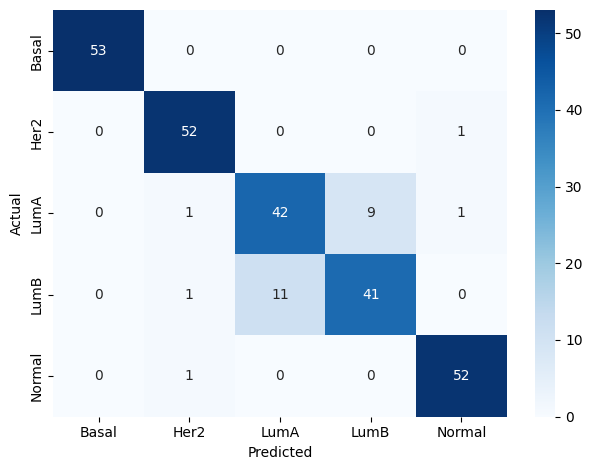

+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|    | Class   | Classifier   | Dataset      |   No. of Features |      PPV |      NPV |   Specificity |   Sensitivity |   Accuracy |
+====+=========+==============+==============+===================+==========+==========+===============+===============+============+
|  0 | Basal   | RF           | BreastCancer |                 8 | 1        | 0.995305 |      1        |      0.981132 |   0.996226 |
+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|  1 | Her2    | RF           | BreastCancer |                 8 | 0.944444 | 0.990521 |      0.985849 |      0.962264 |   0.981132 |
+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|  2 | LumA    | RF           | BreastCancer |                

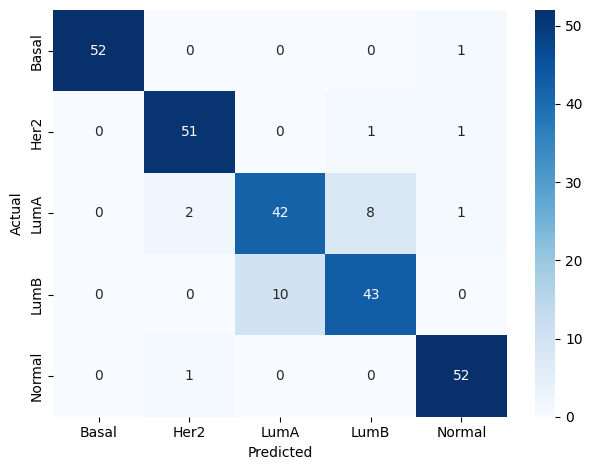

+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|    | Class   | Classifier   | Dataset      |   No. of Features |      PPV |      NPV |   Specificity |   Sensitivity |   Accuracy |
+====+=========+==============+==============+===================+==========+==========+===============+===============+============+
|  0 | Basal   | RF           | BreastCancer |                 9 | 1        | 0.995305 |      1        |      0.981132 |   0.996226 |
+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|  1 | Her2    | RF           | BreastCancer |                 9 | 0.962264 | 0.990566 |      0.990566 |      0.962264 |   0.984906 |
+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|  2 | LumA    | RF           | BreastCancer |                

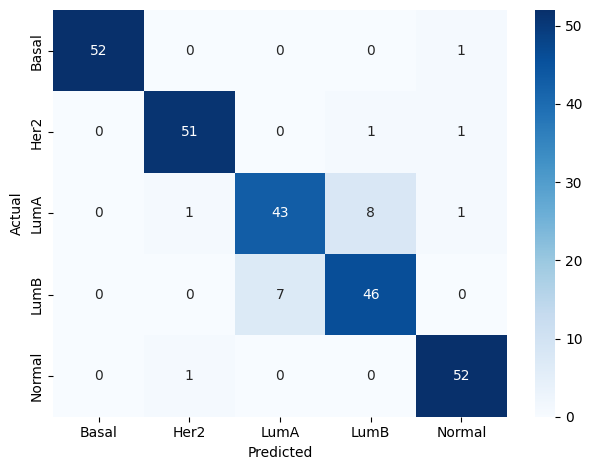

+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|    | Class   | Classifier   | Dataset      |   No. of Features |      PPV |      NPV |   Specificity |   Sensitivity |   Accuracy |
+====+=========+==============+==============+===================+==========+==========+===============+===============+============+
|  0 | Basal   | RF           | BreastCancer |                10 | 1        | 0.995305 |      1        |      0.981132 |   0.996226 |
+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|  1 | Her2    | RF           | BreastCancer |                10 | 0.980769 | 0.99061  |      0.995283 |      0.962264 |   0.988679 |
+----+---------+--------------+--------------+-------------------+----------+----------+---------------+---------------+------------+
|  2 | LumA    | RF           | BreastCancer |                

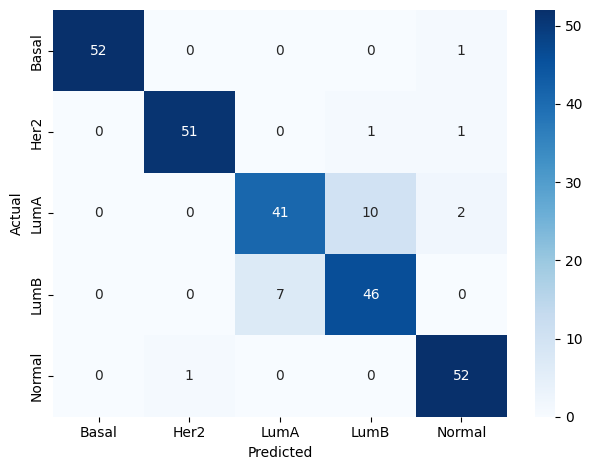

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


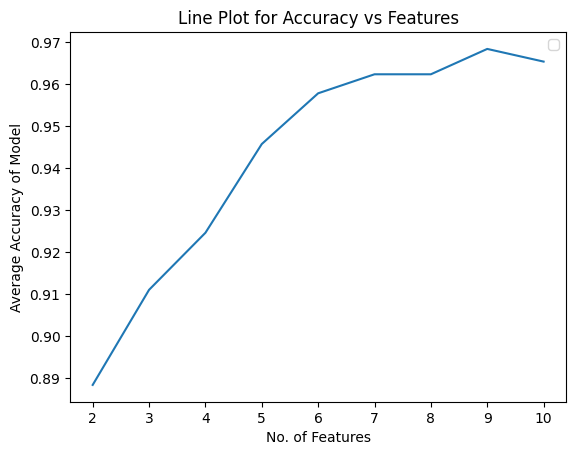

In [170]:
accuracy_list = []
feature_count_list = []

# Loop through different numbers of features (n)
for n in range(2, 11):
    # Extract the first n+1 selected features
    newFeature = X_resampled[[selected_features[i] for i in range(0, n+1)]]

    # Initialize a Random Forest Classifier
    rf = RandomForestClassifier(n_estimators=300, random_state=42)

    # Initialize a One-vs-One Classifier using the Random Forest as the base classifier
    ovo = OneVsOneClassifier(rf, n_jobs=-1)

    # Use cross_val_predict for cross-validation and prediction
    cv_results = cross_val_predict(ovo, newFeature, y_resampled, cv=10)

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_resampled, cv_results)

    # Calculate and print metrics for each class
    calculate_metrics_multiclass(conf_matrix, n, ['Basal', 'Her2', 'LumA', 'LumB', 'Normal'])

    # Visualize the confusion matrix using a heatmap
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Basal', 'Her2', 'LumA', 'LumB', 'Normal'], yticklabels=['Basal', 'Her2', 'LumA', 'LumB', 'Normal'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# Plot a line graph showing the relationship between the number of features and average accuracy
plt.plot(featureCount, accuracyList, label="")

# Add labels and legend
plt.xlabel('No. of Features')
plt.ylabel('Average Accuracy of Model')
plt.title('Line Plot for Accuracy vs Features')
plt.legend()

# Show the plot
plt.show()
